> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [soccer Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [116]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [117]:
import pandas as pd 
import numpy as np 
%matplotlib inline
import datetime
import matplotlib.pyplot as plt
import seaborn as sns


In [118]:
match=pd.read_csv("Database_Soccer/Match.csv")
player=pd.read_csv("Database_Soccer/Player.csv")
player_att=pd.read_csv("Database_Soccer/Player_Attributes.csv")
team=pd.read_csv("Database_Soccer/Team.csv")
team_att=pd.read_csv("Database_Soccer/Team_Attributes.csv")
country=pd.read_csv("Database_Soccer/Country.csv")
league=pd.read_csv("Database_Soccer/League.csv")




EXPLRING EACH TABLE

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

### Exploring Each Table


**Match File.**

In [119]:
match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [120]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#extrat the name , id from league table and collect it into a dict to map it into a match file

def na_id(name,id):
    name=name.split()[0]
    return id,name

league_id_name=league[["id","name"]].apply(lambda x: na_id(x["name"],x["id"]),axis=1)
dict(league_id_name.values)

{1: 'Belgium',
 1729: 'England',
 4769: 'France',
 7809: 'Germany',
 10257: 'Italy',
 13274: 'Netherlands',
 15722: 'Poland',
 17642: 'Portugal',
 19694: 'Scotland',
 21518: 'Spain',
 24558: 'Switzerland'}

In [121]:
match["league_name"]=match["league_id"].map(dict(league_id_name.values))

In [122]:
match["league_name"].value_counts()

England        3040
France         3040
Spain          3040
Italy          3017
Germany        2448
Netherlands    2448
Portugal       2052
Poland         1920
Scotland       1824
Belgium        1728
Switzerland    1422
Name: league_name, dtype: int64

In [123]:
#change the date from object to datetime
match["date"]=pd.to_datetime(match["date"])

In [124]:
#create a year column from the date
match["year"]=match["date"].dt.year

In [125]:
match.dtypes

id               int64
country_id       int64
league_id        int64
season          object
stage            int64
                ...   
BSH            float64
BSD            float64
BSA            float64
league_name     object
year             int64
Length: 117, dtype: object

In [126]:
match.year.value_counts()

2015    3374
2009    3306
2012    3269
2011    3255
2010    3250
2014    3166
2013    3116
2016    1630
2008    1613
Name: year, dtype: int64


**Player & Player Attributes file.**

In [129]:
player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [130]:
#convert the birthday column type : from obj to datetime 
player["birthday"]=pd.to_datetime(player["birthday"])


In [131]:
#extract the year from the birthday column and subtract from it 5 years from 2021 to 2016 and put the result in a new column called age of the player
player["age"]=datetime.datetime.now().year - player["birthday"].dt.year - 5

In [132]:
player["age"].value_counts()

28    802
27    723
29    722
30    710
25    699
26    696
24    643
32    607
31    593
33    541
23    529
34    487
35    475
22    462
36    434
37    345
21    331
38    263
20    234
39    191
40    156
41    113
19    103
42     77
43     43
18     24
44     22
46     12
45     12
47      6
17      3
49      1
48      1
Name: age, dtype: int64

In [133]:
#create season column from date column in the player attributes file
player_att["date"]=pd.to_datetime(player_att["date"])
player_att["season"]=player_att["date"].dt.year

In [134]:
#creating a new column in player_att for name_player
#so first we collect the player_id with the name_player into a dict
# and map it into the player_att file
player_name_id=dict(player[["player_api_id","player_name"]].values)

In [135]:
player_name_id


{505942: 'Aaron Appindangoye',
 155782: 'Aaron Cresswell',
 162549: 'Aaron Doran',
 30572: 'Aaron Galindo',
 23780: 'Aaron Hughes',
 27316: 'Aaron Hunt',
 564793: 'Aaron Kuhl',
 30895: 'Aaron Lennon',
 528212: 'Aaron Lennox',
 101042: 'Aaron Meijers',
 23889: 'Aaron Mokoena',
 231592: 'Aaron Mooy',
 163222: 'Aaron Muirhead',
 40719: 'Aaron Niguez',
 75489: 'Aaron Ramsey',
 597948: 'Aaron Splaine',
 161644: 'Aaron Taylor-Sinclair',
 23499: 'Aaron Wilbraham',
 120919: 'Aatif Chahechouhe',
 46447: 'Abasse Ba',
 167027: 'Abdelaziz Barrada',
 245653: 'Abdelfettah Boukhriss',
 128456: 'Abdelhamid El Kaoutari',
 42664: 'Abdelkader Ghezzal',
 425950: 'Abdellah Zoubir',
 38423: 'Abdelmajid Oulmers',
 3264: 'Abdelmalek Cherrad',
 467485: 'Abdelmalek El Hasnaoui',
 306735: 'Abdelouahed Chakhsi',
 41659: 'Abderrazak Jadid',
 31684: 'Abdeslam Ouaddou',
 32637: 'Abdessalam Benjelloun',
 563215: 'Abdou Diallo',
 41093: 'Abdou Traore',
 564712: 'Abdoul Ba',
 67334: 'Abdoul Karim Yoda',
 173955: 'Abdou

In [137]:
player_att["player_name"]=player_att["player_api_id"].map(player_name_id)

In [136]:
player_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 43 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   183978 non-null  int64         
 1   player_fifa_api_id   183978 non-null  int64         
 2   player_api_id        183978 non-null  int64         
 3   date                 183978 non-null  datetime64[ns]
 4   overall_rating       183142 non-null  float64       
 5   potential            183142 non-null  float64       
 6   preferred_foot       183142 non-null  object        
 7   attacking_work_rate  180748 non-null  object        
 8   defensive_work_rate  183142 non-null  object        
 9   crossing             183142 non-null  float64       
 10  finishing            183142 non-null  float64       
 11  heading_accuracy     183142 non-null  float64       
 12  short_passing        183142 non-null  float64       
 13  volleys       

In [139]:
#creating a new column in a player_att with player_age
#first , collecting the player_id with its birth in a dict
#then mapping it into the player_att file
player_name_age=dict(player[["player_api_id","birthday"]].values)

In [140]:
player_att["player_age"]=player_att["player_api_id"].map(player_name_age)

In [141]:
player_att.rename(columns={"player_age":"player_birthday"},inplace=True)

In [142]:
player_att["player_age"]=datetime.datetime.now().year - player_att["player_birthday"].dt.year - 5

In [143]:
player_att["player_age"].value_counts()

28    15359
29    13846
30    13677
27    13620
26    12622
25    12588
32    11380
31    11309
24    10412
33     9795
23     8390
34     8266
35     7764
22     6666
36     6485
37     4912
21     4055
38     3367
20     2291
39     2183
40     1586
41     1008
19      897
42      597
43      346
44      179
18      135
45      112
46       78
47       35
17       10
49        4
48        4
Name: player_age, dtype: int64

In [232]:
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  11060 non-null  int64         
 1   player_api_id       11060 non-null  int64         
 2   player_name         11060 non-null  object        
 3   player_fifa_api_id  11060 non-null  int64         
 4   birthday            11060 non-null  datetime64[ns]
 5   height              11060 non-null  float64       
 6   weight              11060 non-null  int64         
 7   age                 11060 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 691.4+ KB


In [233]:
player_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 46 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   183978 non-null  int64         
 1   player_fifa_api_id   183978 non-null  int64         
 2   player_api_id        183978 non-null  int64         
 3   date                 183978 non-null  datetime64[ns]
 4   overall_rating       183978 non-null  float64       
 5   potential            183978 non-null  float64       
 6   preferred_foot       183142 non-null  object        
 7   attacking_work_rate  180748 non-null  object        
 8   defensive_work_rate  183142 non-null  object        
 9   crossing             183978 non-null  float64       
 10  finishing            183978 non-null  float64       
 11  heading_accuracy     183978 non-null  float64       
 12  short_passing        183978 non-null  float64       
 13  volleys       

In [145]:
player.shape

(11060, 8)

**Team & Team Attributes File.**

In [146]:
team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [147]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

#extract from the date , year or "Season"
team_att["date"]=pd.to_datetime(team_att["date"])
team_att["season"]=team_att["date"].dt.year

In [234]:
team_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              1458 non-null   int64         
 1   team_fifa_api_id                1458 non-null   int64         
 2   team_api_id                     1458 non-null   int64         
 3   date                            1458 non-null   datetime64[ns]
 4   buildUpPlaySpeed                1458 non-null   int64         
 5   buildUpPlaySpeedClass           1458 non-null   object        
 6   buildUpPlayDribbling            489 non-null    float64       
 7   buildUpPlayDribblingClass       1458 non-null   object        
 8   buildUpPlayPassing              1458 non-null   int64         
 9   buildUpPlayPassingClass         1458 non-null   object        
 10  buildUpPlayPositioningClass     1458 non-null   object        
 11  chan

In [149]:
team_name_id=dict(team[["team_api_id","team_long_name"]].values)

In [150]:
team_att["team_name"]=team_att["team_api_id"].map(team_name_id)

In [235]:
team_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              1458 non-null   int64         
 1   team_fifa_api_id                1458 non-null   int64         
 2   team_api_id                     1458 non-null   int64         
 3   date                            1458 non-null   datetime64[ns]
 4   buildUpPlaySpeed                1458 non-null   int64         
 5   buildUpPlaySpeedClass           1458 non-null   object        
 6   buildUpPlayDribbling            489 non-null    float64       
 7   buildUpPlayDribblingClass       1458 non-null   object        
 8   buildUpPlayPassing              1458 non-null   int64         
 9   buildUpPlayPassingClass         1458 non-null   object        
 10  buildUpPlayPositioningClass     1458 non-null   object        
 11  chan

In [152]:
team.dtypes

id                    int64
team_api_id           int64
team_fifa_api_id    float64
team_long_name       object
team_short_name      object
dtype: object

In [153]:
team.shape

(299, 5)

In [236]:
team_att.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,season,team_name
0,1,434,9930,2010-02-22,60,Balanced,NaN,Little,50,Mixed,...,Organised,50,Medium,55,Press,45,Normal,Cover,2010,FC Aarau
1,2,434,9930,2014-09-19,52,Balanced,48.0,Normal,56,Mixed,...,Organised,47,Medium,44,Press,54,Normal,Cover,2014,FC Aarau
2,3,434,9930,2015-09-10,47,Balanced,41.0,Normal,54,Mixed,...,Organised,47,Medium,44,Press,54,Normal,Cover,2015,FC Aarau
3,4,77,8485,2010-02-22,70,Fast,NaN,Little,70,Long,...,Organised,60,Medium,70,Double,70,Wide,Cover,2010,Aberdeen
4,5,77,8485,2011-02-22,47,Balanced,NaN,Little,52,Mixed,...,Organised,47,Medium,47,Press,52,Normal,Cover,2011,Aberdeen


In [155]:
team_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              1458 non-null   int64         
 1   team_fifa_api_id                1458 non-null   int64         
 2   team_api_id                     1458 non-null   int64         
 3   date                            1458 non-null   datetime64[ns]
 4   buildUpPlaySpeed                1458 non-null   int64         
 5   buildUpPlaySpeedClass           1458 non-null   object        
 6   buildUpPlayDribbling            489 non-null    float64       
 7   buildUpPlayDribblingClass       1458 non-null   object        
 8   buildUpPlayPassing              1458 non-null   int64         
 9   buildUpPlayPassingClass         1458 non-null   object        
 10  buildUpPlayPositioningClass     1458 non-null   object        
 11  chan

In [156]:
team_att.dtypes

id                                         int64
team_fifa_api_id                           int64
team_api_id                                int64
date                              datetime64[ns]
buildUpPlaySpeed                           int64
buildUpPlaySpeedClass                     object
buildUpPlayDribbling                     float64
buildUpPlayDribblingClass                 object
buildUpPlayPassing                         int64
buildUpPlayPassingClass                   object
buildUpPlayPositioningClass               object
chanceCreationPassing                      int64
chanceCreationPassingClass                object
chanceCreationCrossing                     int64
chanceCreationCrossingClass               object
chanceCreationShooting                     int64
chanceCreationShootingClass               object
chanceCreationPositioningClass            object
defencePressure                            int64
defencePressureClass                      object
defenceAggression   

In [157]:
team_att.shape

(1458, 27)

**League File.**

In [158]:
league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [159]:
league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


In [160]:
league.shape

(11, 3)

**Country File.**

In [161]:
country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [162]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


In [163]:
country.shape

(11, 2)

### Data Wrangling Summary

**Match file**
- creating new column with name "league_name"
- season column

**player & player_att file**
- player_name columns in both file 
- player_age and birthday

**team & team_att file**
- new columns with name "team_name"
- season column


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [164]:
for m in match.columns:
    print(f"{m} - {match[m].isna().sum()}")

id - 0
country_id - 0
league_id - 0
season - 0
stage - 0
date - 0
match_api_id - 0
home_team_api_id - 0
away_team_api_id - 0
home_team_goal - 0
away_team_goal - 0
home_player_X1 - 1821
home_player_X2 - 1821
home_player_X3 - 1832
home_player_X4 - 1832
home_player_X5 - 1832
home_player_X6 - 1832
home_player_X7 - 1832
home_player_X8 - 1832
home_player_X9 - 1832
home_player_X10 - 1832
home_player_X11 - 1832
away_player_X1 - 1832
away_player_X2 - 1832
away_player_X3 - 1832
away_player_X4 - 1832
away_player_X5 - 1832
away_player_X6 - 1832
away_player_X7 - 1832
away_player_X8 - 1832
away_player_X9 - 1833
away_player_X10 - 1833
away_player_X11 - 1839
home_player_Y1 - 1821
home_player_Y2 - 1821
home_player_Y3 - 1832
home_player_Y4 - 1832
home_player_Y5 - 1832
home_player_Y6 - 1832
home_player_Y7 - 1832
home_player_Y8 - 1832
home_player_Y9 - 1832
home_player_Y10 - 1832
home_player_Y11 - 1832
away_player_Y1 - 1832
away_player_Y2 - 1832
away_player_Y3 - 1832
away_player_Y4 - 1832
away_player_Y5 - 

In [165]:
# we will drop the row of home_player and away_player bec we cant re-discover it and we cant take its mean 
match.dropna(subset=['home_player_X1',
       'home_player_X2', 'home_player_X3', 'home_player_X4',
       'home_player_X5', 'home_player_X6', 'home_player_X7',
       'home_player_X8', 'home_player_X9', 'home_player_X10',
       'home_player_X11', 'away_player_X1', 'away_player_X2',
       'away_player_X3', 'away_player_X4', 'away_player_X5',
       'away_player_X6', 'away_player_X7', 'away_player_X8',
       'away_player_X9', 'away_player_X10', 'away_player_X11',
       'home_player_Y1', 'home_player_Y2', 'home_player_Y3',
       'home_player_Y4', 'home_player_Y5', 'home_player_Y6',
       'home_player_Y7', 'home_player_Y8', 'home_player_Y9',
       'home_player_Y10', 'home_player_Y11', 'away_player_Y1',
       'away_player_Y2', 'away_player_Y3', 'away_player_Y4',
       'away_player_Y5', 'away_player_Y6', 'away_player_Y7',
       'away_player_Y8', 'away_player_Y9', 'away_player_Y10',
       'away_player_Y11', 'home_player_1', 'home_player_2',
       'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6',
       'home_player_7', 'home_player_8', 'home_player_9',
       'home_player_10', 'home_player_11', 'away_player_1',
       'away_player_2', 'away_player_3', 'away_player_4', 'away_player_5',
       'away_player_6', 'away_player_7', 'away_player_8', 'away_player_9',
       'away_player_10', 'away_player_11',],inplace=True)
       #drop the unused coloumns
match.drop(['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH',
'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'SJH',
'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH',
'BSD', 'BSA'],axis=1,inplace=True)

In [166]:
for m in match.columns:
    print(f"{m} - {match[m].isna().sum()}")

id - 0
country_id - 0
league_id - 0
season - 0
stage - 0
date - 0
match_api_id - 0
home_team_api_id - 0
away_team_api_id - 0
home_team_goal - 0
away_team_goal - 0
home_player_X1 - 0
home_player_X2 - 0
home_player_X3 - 0
home_player_X4 - 0
home_player_X5 - 0
home_player_X6 - 0
home_player_X7 - 0
home_player_X8 - 0
home_player_X9 - 0
home_player_X10 - 0
home_player_X11 - 0
away_player_X1 - 0
away_player_X2 - 0
away_player_X3 - 0
away_player_X4 - 0
away_player_X5 - 0
away_player_X6 - 0
away_player_X7 - 0
away_player_X8 - 0
away_player_X9 - 0
away_player_X10 - 0
away_player_X11 - 0
home_player_Y1 - 0
home_player_Y2 - 0
home_player_Y3 - 0
home_player_Y4 - 0
home_player_Y5 - 0
home_player_Y6 - 0
home_player_Y7 - 0
home_player_Y8 - 0
home_player_Y9 - 0
home_player_Y10 - 0
home_player_Y11 - 0
away_player_Y1 - 0
away_player_Y2 - 0
away_player_Y3 - 0
away_player_Y4 - 0
away_player_Y5 - 0
away_player_Y6 - 0
away_player_Y7 - 0
away_player_Y8 - 0
away_player_Y9 - 0
away_player_Y10 - 0
away_player_Y

In [167]:
match.shape

(21361, 87)

In [168]:
match.cross.value_counts()

<cross />                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [169]:
# we will drop the rows of the rest missing data bec we cant re-discover it and we cant take its mean as its format is unknown

match.dropna() 


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,league_name,year
1728,1729,1729,1729,2008/2009,1,2008-08-17,489042,10260,10261,1,...,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>56</comment><event...,England,2008
1729,1730,1729,1729,2008/2009,1,2008-08-16,489043,9825,8659,1,...,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card />,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>65</comment><event...,England,2008
1730,1731,1729,1729,2008/2009,1,2008-08-16,489044,8472,8650,0,...,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>45</comment><event...,England,2008
1731,1732,1729,1729,2008/2009,1,2008-08-16,489045,8654,8528,2,...,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>50</comment><event...,England,2008
1733,1734,1729,1729,2008/2009,1,2008-08-16,489047,8668,8655,2,...,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><shoton>1</shoton></stat...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>46</comment><event...,England,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25944,25945,24558,24558,2015/2016,36,2016-05-25,1992225,9931,9956,0,...,<goal><value><comment>o</comment><stats><owngo...,<shoton />,<shotoff />,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />,Switzerland,2016
25945,25946,24558,24558,2015/2016,36,2016-05-25,1992226,7896,10190,3,...,<goal><value><comment>n</comment><stats><goals...,<shoton />,<shotoff />,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />,Switzerland,2016
25946,25947,24558,24558,2015/2016,36,2016-05-25,1992227,10199,10179,2,...,<goal><value><comment>n</comment><stats><goals...,<shoton />,<shotoff />,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />,Switzerland,2016
25947,25948,24558,24558,2015/2016,36,2016-05-25,1992228,10191,10192,0,...,<goal><value><comment>n</comment><stats><goals...,<shoton />,<shotoff />,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />,Switzerland,2016


In [170]:
match.duplicated().sum()

0

player att cleaning 

In [171]:
for m in player_att.columns:
    print(f"{m} - {player_att[m].isna().sum()}")

id - 0
player_fifa_api_id - 0
player_api_id - 0
date - 0
overall_rating - 836
potential - 836
preferred_foot - 836
attacking_work_rate - 3230
defensive_work_rate - 836
crossing - 836
finishing - 836
heading_accuracy - 836
short_passing - 836
volleys - 2713
dribbling - 836
curve - 2713
free_kick_accuracy - 836
long_passing - 836
ball_control - 836
acceleration - 836
sprint_speed - 836
agility - 2713
reactions - 836
balance - 2713
shot_power - 836
jumping - 2713
stamina - 836
strength - 836
long_shots - 836
aggression - 836
interceptions - 836
positioning - 836
vision - 2713
penalties - 836
marking - 836
standing_tackle - 836
sliding_tackle - 2713
gk_diving - 836
gk_handling - 836
gk_kicking - 836
gk_positioning - 836
gk_reflexes - 836
season - 0
player_name - 0
player_birthday - 0
player_age - 0


In [172]:
#in penalties columns , the missing value can be replaced by 0 , to keep the values on track

player_att["penalties"]=player_att["penalties"].fillna(0)

In [230]:

for c in player_att.columns:
    if player_att[c].dtype!="object" and player_att[c].isnull().any():
        player_att[c]=player_att[c].fillna(player_att[c].mean())
    else:
        continue


In [231]:
player_att.isna().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating            0
potential                 0
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                  0
finishing                 0
heading_accuracy          0
short_passing             0
volleys                   0
dribbling                 0
curve                     0
free_kick_accuracy        0
long_passing              0
ball_control              0
acceleration              0
sprint_speed              0
agility                   0
reactions                 0
balance                   0
shot_power                0
jumping                   0
stamina                   0
strength                  0
long_shots                0
aggression                0
interceptions             0
positioning               0
vision                    0
penalties                 0
marking                   0
standing_tackle     

In [176]:
player_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 46 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   183978 non-null  int64         
 1   player_fifa_api_id   183978 non-null  int64         
 2   player_api_id        183978 non-null  int64         
 3   date                 183978 non-null  datetime64[ns]
 4   overall_rating       183978 non-null  float64       
 5   potential            183978 non-null  float64       
 6   preferred_foot       183142 non-null  object        
 7   attacking_work_rate  180748 non-null  object        
 8   defensive_work_rate  183142 non-null  object        
 9   crossing             183978 non-null  float64       
 10  finishing            183978 non-null  float64       
 11  heading_accuracy     183978 non-null  float64       
 12  short_passing        183978 non-null  float64       
 13  volleys       

In [177]:
#it is not necessary to deal with the 3 columns which have missing values , so i leave it to keep the mean and median as it is 

player_att["attacking_work_rate"].value_counts()

medium    125070
high       42823
low         8569
None        3639
norm         348
y            106
le           104
stoc          89
Name: attacking_work_rate, dtype: int64

In [178]:
#checking if there is any duplicate row
player_att.duplicated().sum()

0

clean the team_Attr file

In [179]:
team_att.isna().sum()

id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
season                              0
team_name   

In [180]:
# the column : buildUpPlayDribbling, i will not work on it , so i will leave it as it is
#checking if there is any duplicate files

team_att.duplicated().sum()  

0

summary of data cleaning
- match file : all the unnecessary columns are deletet like the bettind odds columns , all the misiing values are replaced by the mean of the column 

- player att file :the missing value of the penalty column is replcaed by 0  , the rest of the columns are replaced by the mean ,except 3 columns , i left them because i will not use them

- team att : the columns are clear except a column , i wont use it so i left it as it is

- the files above have no duplicated rows


---------------------------------------------------------------

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 : Do all leagues play the same number of matches!

In [181]:
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  11060 non-null  int64         
 1   player_api_id       11060 non-null  int64         
 2   player_name         11060 non-null  object        
 3   player_fifa_api_id  11060 non-null  int64         
 4   birthday            11060 non-null  datetime64[ns]
 5   height              11060 non-null  float64       
 6   weight              11060 non-null  int64         
 7   age                 11060 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 691.4+ KB


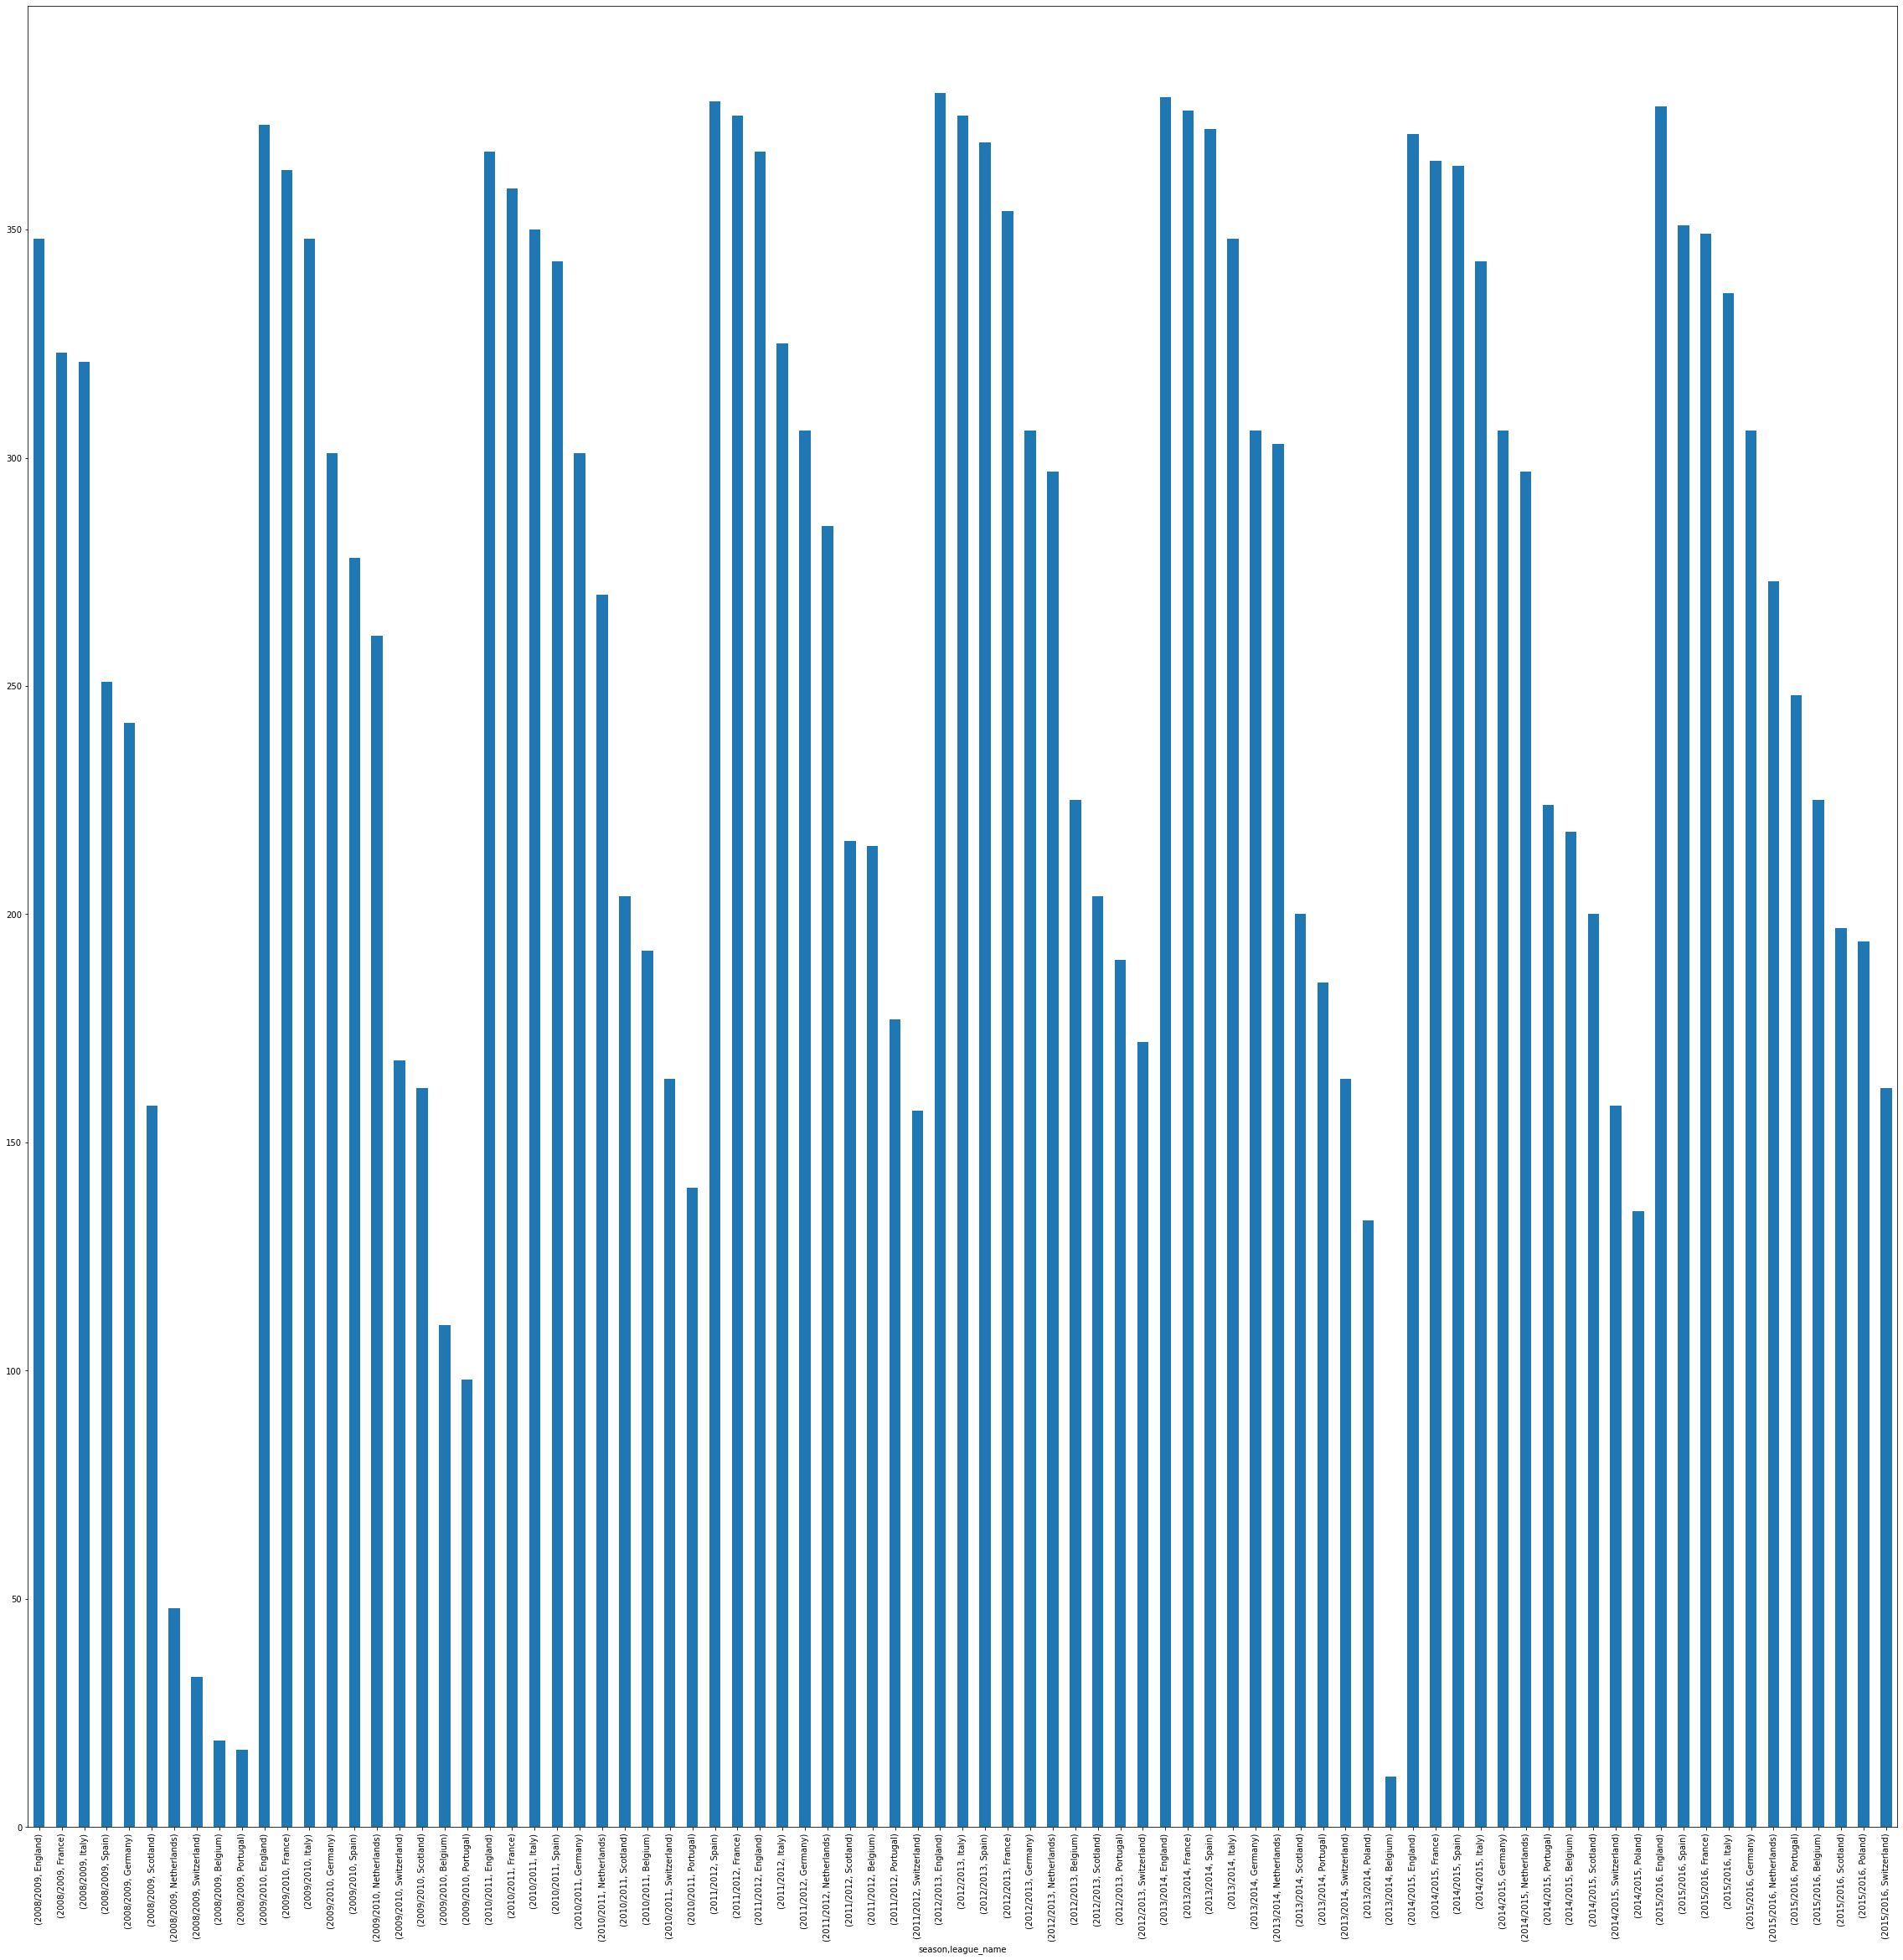

In [182]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

number_of_matches_per_season=match.groupby(["season"])["league_name"].value_counts().plot(kind="bar",figsize=(40,40))
# plt.title('number of matches in league per season')
# plt.xlabel('league name per season')
# plt.ylabel('number of matches per season');

In [183]:
match.groupby("season")["league_name"].value_counts()

season     league_name
2008/2009  England        348
           France         323
           Italy          321
           Spain          251
           Germany        242
                         ... 
2015/2016  Portugal       248
           Belgium        225
           Scotland       197
           Poland         194
           Switzerland    162
Name: league_name, Length: 83, dtype: int64

the graph shows that , all leagues are approximately played the same number of matches each season

In [184]:
match.season.value_counts()

2015/2016    3018
2014/2015    2981
2012/2013    2872
2011/2012    2801
2013/2014    2777
2010/2011    2690
2009/2010    2462
2008/2009    1760
Name: season, dtype: int64

<AxesSubplot:xlabel='season,league_name'>

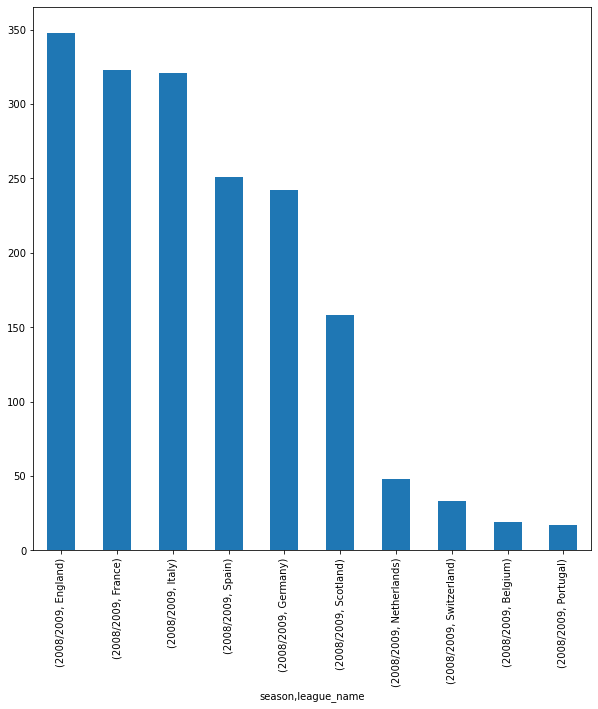

In [185]:
match.query("season=='2008/2009'").groupby(["season"])["league_name"].value_counts().plot(kind="bar",figsize=(10,10))


# list_of_season=['2015/2016'
# '2014/2015'
# '2012/2013'
# '2011/2012'
# '2013/2014'
# '2010/2011'
# '2009/2010'
# '2008/2009']

# for a in list_of_season:
#     print(match.query("season=='a'"))
# y 

1st league in number of matches in season 2008/2009 was premier leagues then france league

<AxesSubplot:xlabel='season,league_name'>

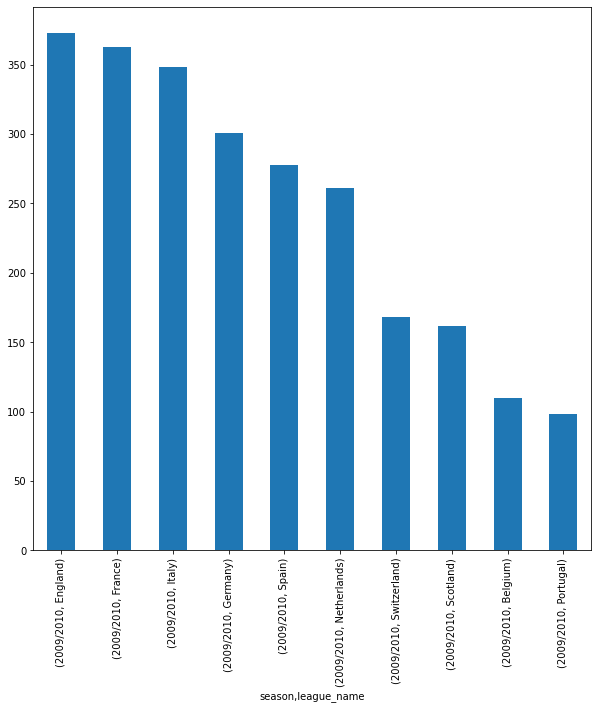

In [186]:
match.query("season=='2009/2010'").groupby(["season"])["league_name"].value_counts().plot(kind="bar",figsize=(10,10))


1st league in number of matches in season 2009/2010 was premier leagues then france league

<AxesSubplot:xlabel='season,league_name'>

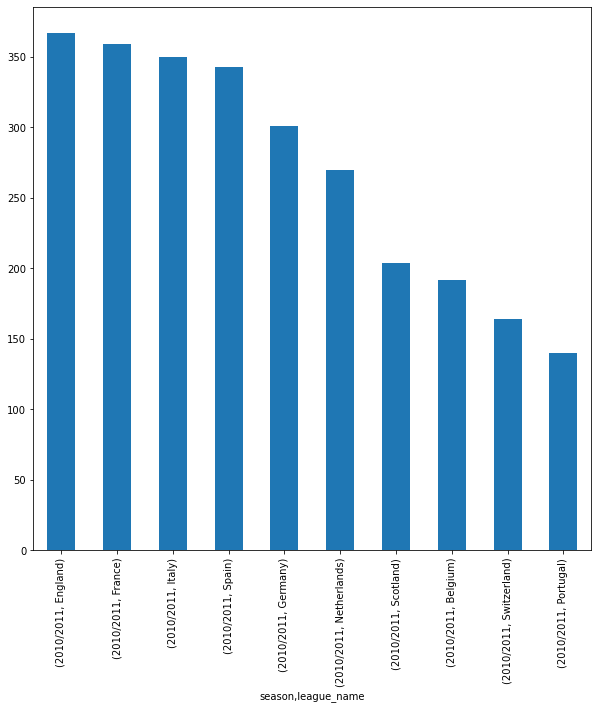

In [187]:
match.query("season=='2010/2011'").groupby(["season"])["league_name"].value_counts().plot(kind="bar",figsize=(10,10))


1st league in number of matches in season 2010/2011 was premier leagues then france league

<AxesSubplot:xlabel='season,league_name'>

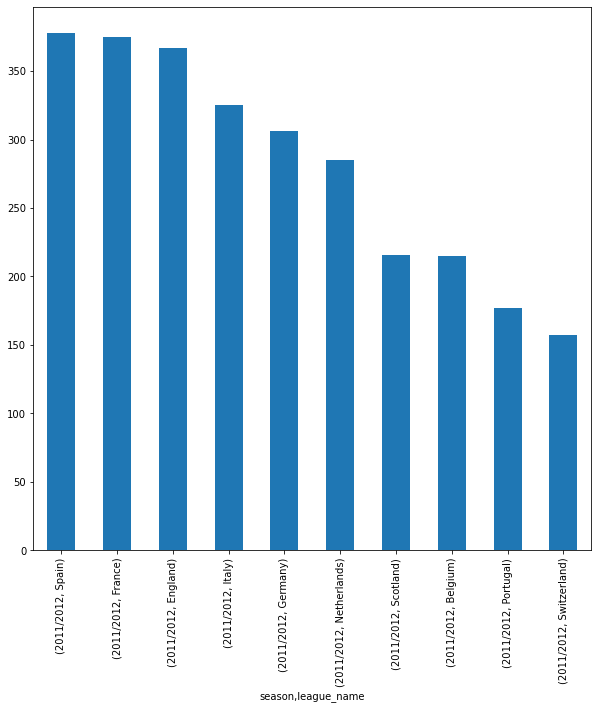

In [188]:
match.query("season=='2011/2012'").groupby(["season"])["league_name"].value_counts().plot(kind="bar",figsize=(10,10))


1st league in number of matches in season 2011/2012 was spain leagues then france league

<AxesSubplot:xlabel='season,league_name'>

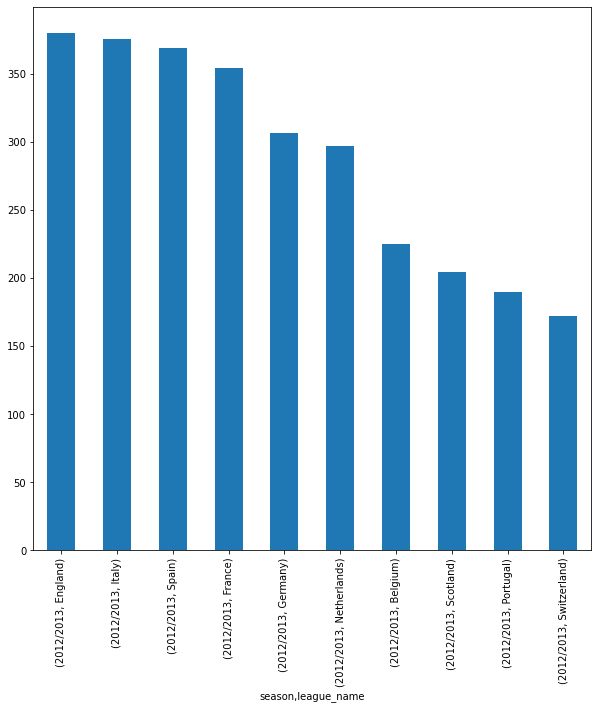

In [189]:
match.query("season=='2012/2013'").groupby(["season"])["league_name"].value_counts().plot(kind="bar",figsize=(10,10))


1st league in number of matches in season 2012/2013 was premier leagues then italy league

<AxesSubplot:xlabel='season,league_name'>

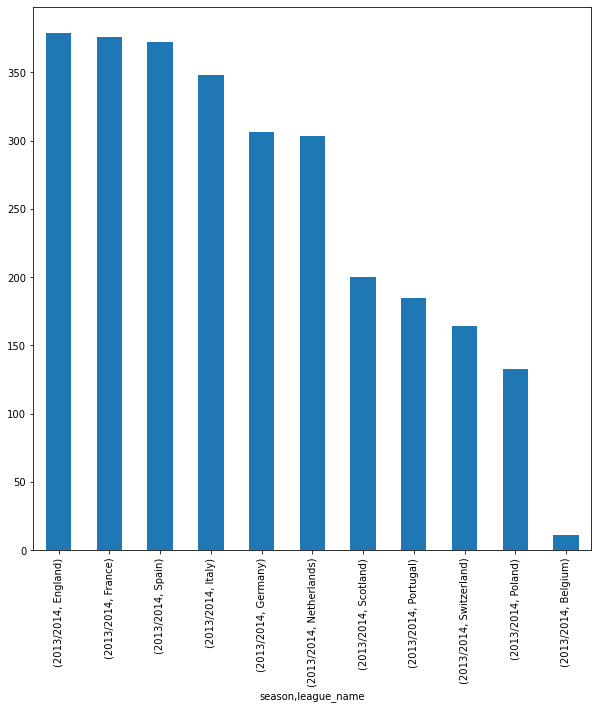

In [190]:
match.query("season=='2013/2014'").groupby(["season"])["league_name"].value_counts().plot(kind="bar",figsize=(10,10))


1st league in number of matches in season 2013/2014 was premier leagues then france league

<AxesSubplot:xlabel='season,league_name'>

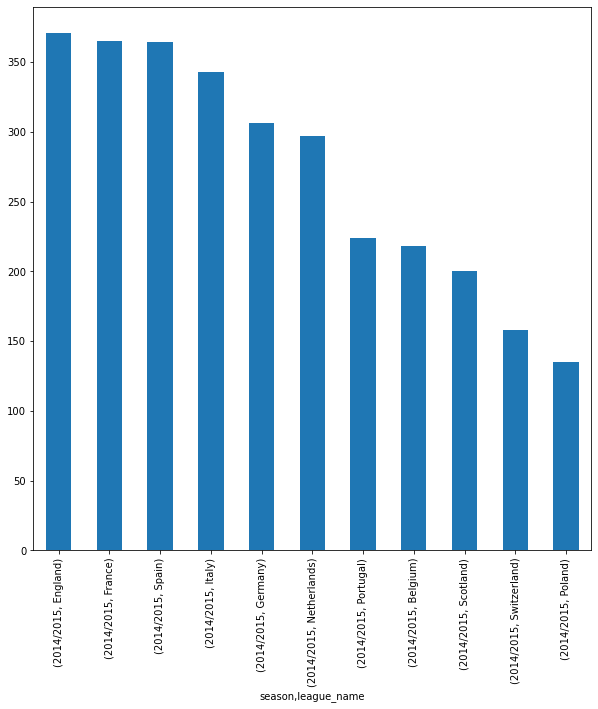

In [191]:
match.query("season=='2014/2015'").groupby(["season"])["league_name"].value_counts().plot(kind="bar",figsize=(10,10))


1st league in number of matches in season 2014/2015 was premier leagues then france league

<AxesSubplot:xlabel='season,league_name'>

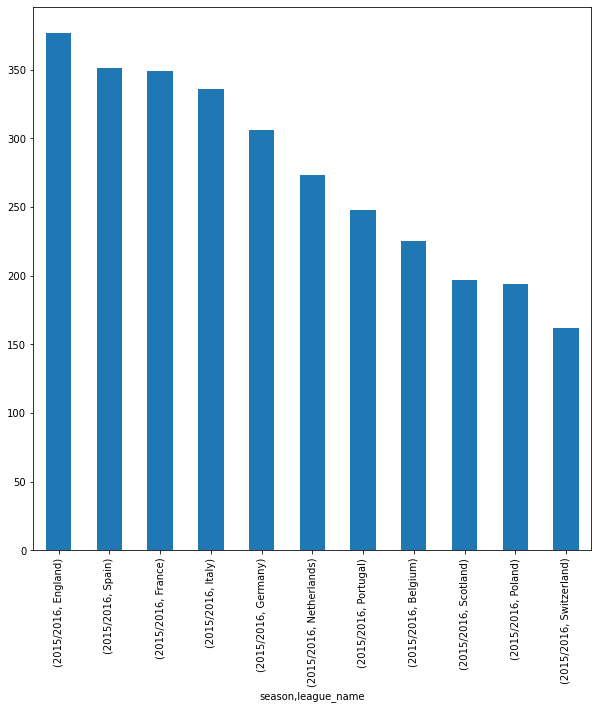

In [192]:
match.query("season=='2015/2016'").groupby(["season"])["league_name"].value_counts().plot(kind="bar",figsize=(10,10))


the premier league has the most number of matches per season since 2008 then spain league

### Research Question 2 : Which season contains the highest number of penalties?
### Research Question 2 : TOP 10 Player scoring penalties in that season!

In [193]:
player_att.groupby(["season"])["penalties"].count()

season
2007    16138
2008     5798
2009     8993
2010    10829
2011    11976
2012    12632
2013    38867
2014    32808
2015    31834
2016    14103
Name: penalties, dtype: int64

<AxesSubplot:xlabel='season'>

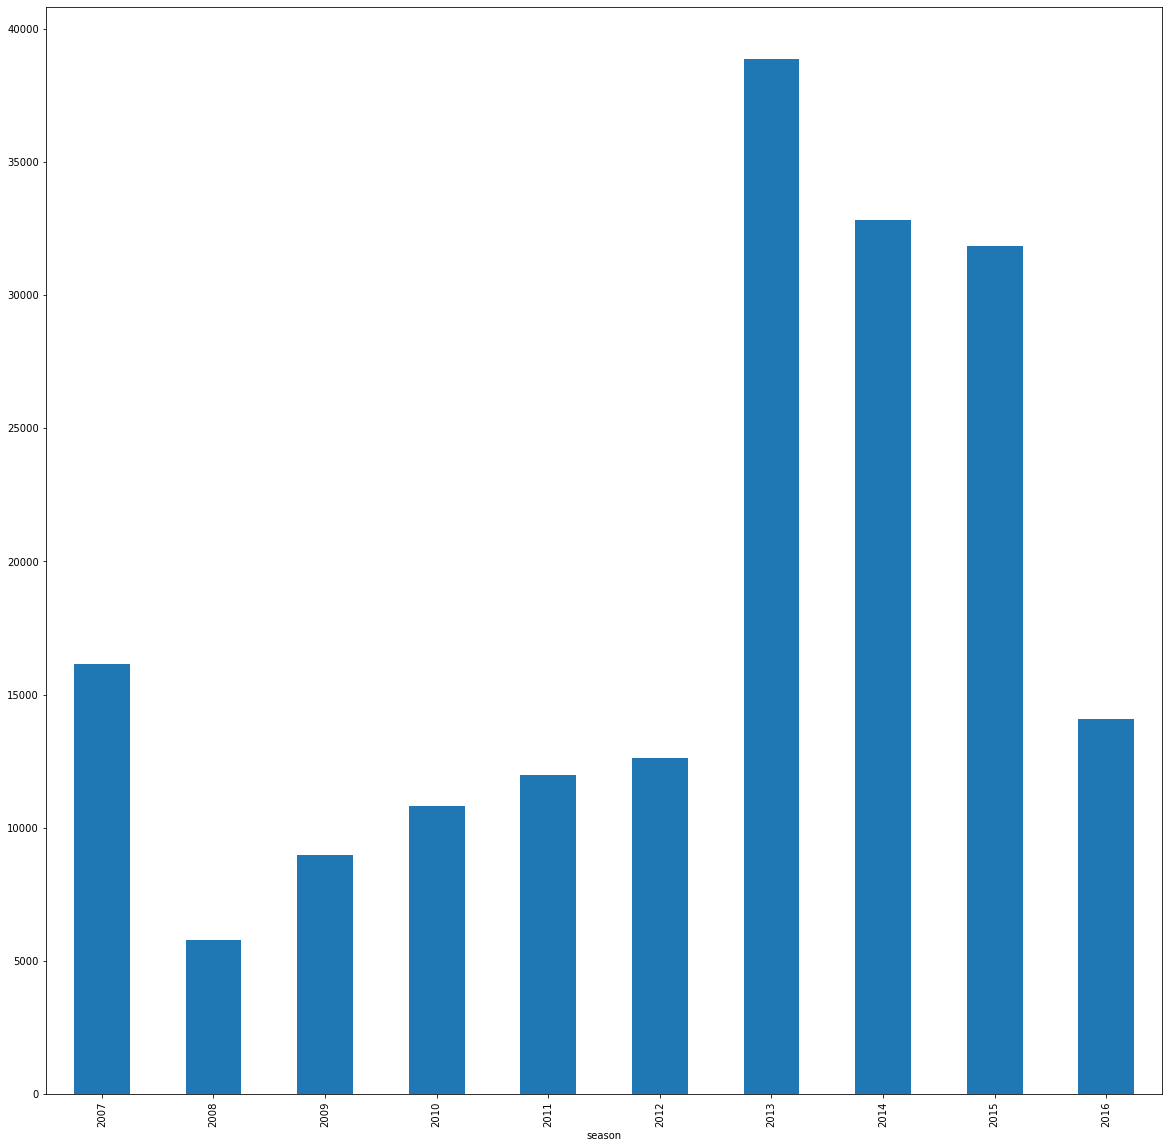

In [194]:
player_att.groupby(["season"])["penalties"].count().plot(kind="bar",figsize=(20,20))

                    season 2013 possesses the most number of penalties 

### TOP 10 penalty players in season 2013 !


In [195]:
# the top 10 player score penalties in season 2013
high_penalty_player=player_att.query("season==2013").groupby(["player_name"])["penalties"].max().sort_values(ascending=False)[:11]
high_penalty_player

player_name
Mario Balotelli       95.0
Rickie Lambert        94.0
Zlatan Ibrahimovic    93.0
David Villa           92.0
Ryan Giggs            91.0
Frank Lampard         91.0
Fabian Monzon         90.0
Francesco Totti       90.0
Filip Daems           90.0
Radamel Falcao        89.0
Diego Milito          89.0
Name: penalties, dtype: float64

Text(0, 0.5, 'number of penalties')

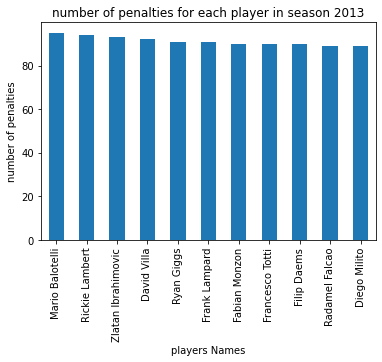

In [196]:
high_penalty_player.plot.bar()
plt.title("number of penalties for each player in season 2013")
plt.xlabel("players Names")
plt.ylabel("number of penalties")


TOP 10 penalty players in 2013

- Mario Balotelli
- Rickie Lambert
- Zlatan Ibrahimovic
- David Villa
- Ryan Giggs
- Frank Lampard
- Fabian Monzon
- Francesco Totti
- Filip Daems
- Radamel Falcao
- Diego Milito



### Research Question 3 (what is the name of the player with the highest attributes and in which season ?!)


In [199]:
player_att.max()

<ipython-input-199-015a893611b0>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  player_att.max()


id                                     183978
player_fifa_api_id                     234141
player_api_id                          750584
date                      2016-07-07 00:00:00
overall_rating                           94.0
potential                                97.0
crossing                                 95.0
finishing                                97.0
heading_accuracy                         98.0
short_passing                            97.0
volleys                                  93.0
dribbling                                97.0
curve                                    94.0
free_kick_accuracy                       97.0
long_passing                             97.0
ball_control                             97.0
acceleration                             97.0
sprint_speed                             97.0
agility                                  96.0
reactions                                96.0
balance                                  96.0
shot_power                        

dos santos fabio junior is the highest player attributes in season 2016

RENEAME ALL TEAMS 

### Research Question 4 (the most win , lose , draw league!)


In [200]:
team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [201]:
#create a new column called "team_api_id" which include the values of the two columns (home and away team api)
match["team_api_id"]=match["home_team_api_id"] 
match.team_api_id.append(match["away_team_api_id"])

145       8203
153       9984
155       8635
162       8203
168      10000
         ...  
25972    10191
25974    10191
25975    10199
25976    10179
25978     9931
Length: 42722, dtype: int64

In [202]:
match["H_team_name"]=match["home_team_api_id"].map(team_name_id)
match["A_team_name"]=match["away_team_api_id"].map(team_name_id)

In [203]:
match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,foulcommit,card,cross,corner,possession,league_name,year,team_api_id,H_team_name,A_team_name
145,146,1,1,2008/2009,24,2009-02-27,493017,8203,9987,2,...,NaN,NaN,NaN,NaN,NaN,Belgium,2009,8203,KV Mechelen,KRC Genk
153,154,1,1,2008/2009,25,2009-03-08,493025,9984,8342,1,...,NaN,NaN,NaN,NaN,NaN,Belgium,2009,9984,KSV Cercle Brugge,Club Brugge KV
155,156,1,1,2008/2009,25,2009-03-07,493027,8635,10000,2,...,NaN,NaN,NaN,NaN,NaN,Belgium,2009,8635,RSC Anderlecht,SV Zulte-Waregem
162,163,1,1,2008/2009,26,2009-03-13,493034,8203,8635,2,...,NaN,NaN,NaN,NaN,NaN,Belgium,2009,8203,KV Mechelen,RSC Anderlecht
168,169,1,1,2008/2009,26,2009-03-14,493040,10000,9999,0,...,NaN,NaN,NaN,NaN,NaN,Belgium,2009,10000,SV Zulte-Waregem,KSV Roeselare


In [204]:
#creating match result column 
#if the home team score more goals it wins , less goals it lose , same as the opponent it draws

match["match_result"]=match["home_team_goal"]- match["away_team_goal"]
def do(r):
    if r==0:
        r="draw"
    elif r>0:
        r="win"
    else:
        r="lose"
    return r
match["match_result"]=match["match_result"].apply(do)

In [205]:
match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,card,cross,corner,possession,league_name,year,team_api_id,H_team_name,A_team_name,match_result
145,146,1,1,2008/2009,24,2009-02-27,493017,8203,9987,2,...,NaN,NaN,NaN,NaN,Belgium,2009,8203,KV Mechelen,KRC Genk,win
153,154,1,1,2008/2009,25,2009-03-08,493025,9984,8342,1,...,NaN,NaN,NaN,NaN,Belgium,2009,9984,KSV Cercle Brugge,Club Brugge KV,lose
155,156,1,1,2008/2009,25,2009-03-07,493027,8635,10000,2,...,NaN,NaN,NaN,NaN,Belgium,2009,8635,RSC Anderlecht,SV Zulte-Waregem,win
162,163,1,1,2008/2009,26,2009-03-13,493034,8203,8635,2,...,NaN,NaN,NaN,NaN,Belgium,2009,8203,KV Mechelen,RSC Anderlecht,win
168,169,1,1,2008/2009,26,2009-03-14,493040,10000,9999,0,...,NaN,NaN,NaN,NaN,Belgium,2009,10000,SV Zulte-Waregem,KSV Roeselare,draw


<AxesSubplot:>

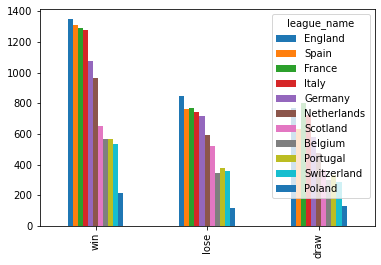

In [206]:
a=match.query("match_result=='win'").groupby("league_name")["match_result"].count().sort_values(ascending=False)
b=match.query("match_result=='lose'").groupby("league_name")["match_result"].count().sort_values(ascending=False)
c=match.query("match_result=='draw'").groupby("league_name")["match_result"].count().sort_values(ascending=False)
df=pd.DataFrame(data=[a,b,c] , index=["win","lose","draw"])
df.plot.bar()


<AxesSubplot:>

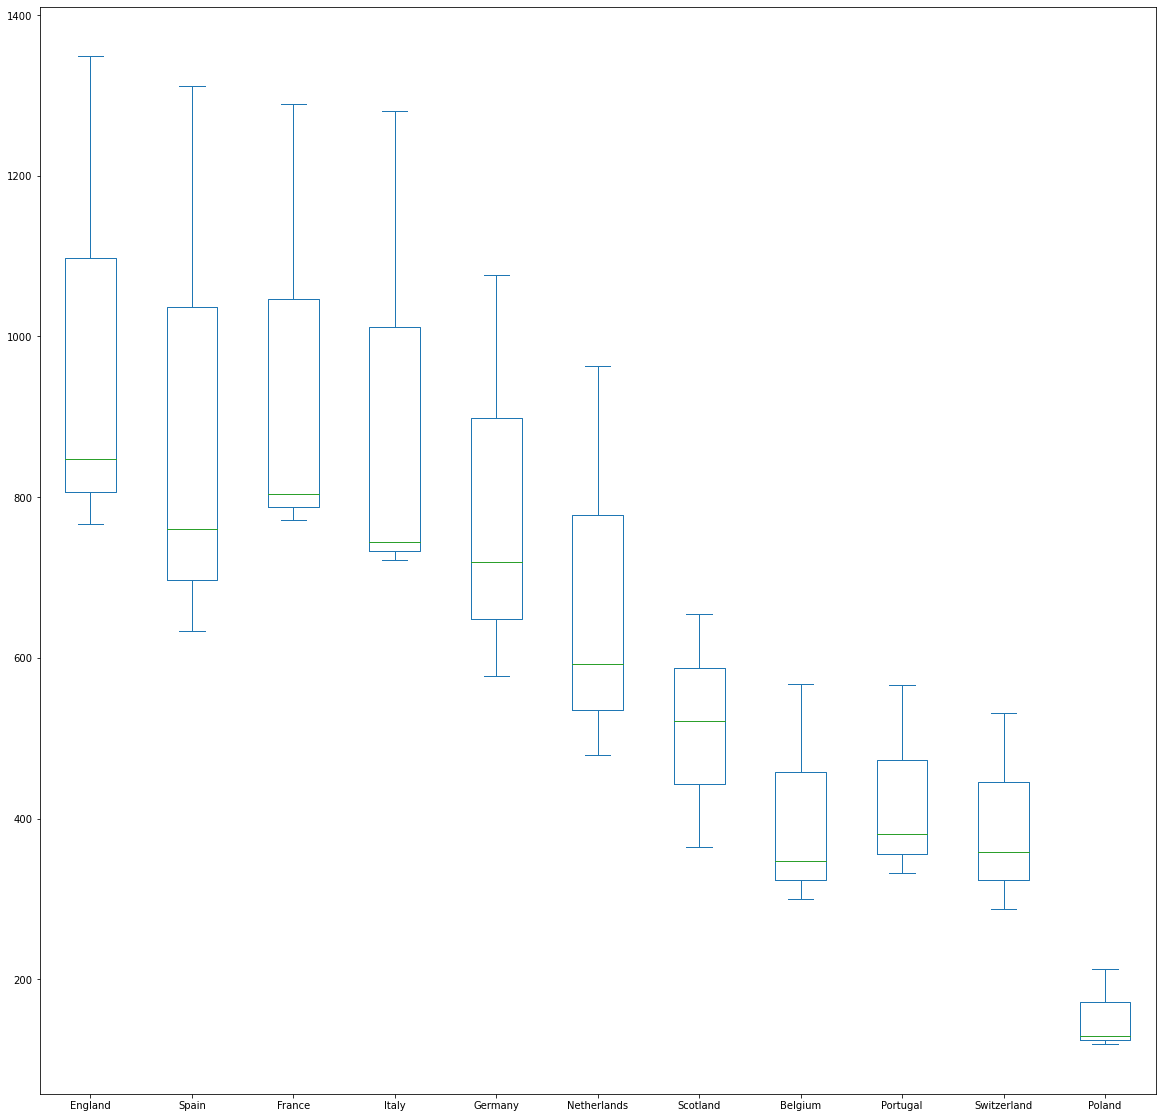

In [207]:
a=match.query("match_result=='win'").groupby("league_name")["match_result"].count().sort_values(ascending=False)
b=match.query("match_result=='lose'").groupby("league_name")["match_result"].count().sort_values(ascending=False)
c=match.query("match_result=='draw'").groupby("league_name")["match_result"].count().sort_values(ascending=False)
df=pd.DataFrame(data=[a,b,c] , index=["win","lose","draw"])
df.plot.box(figsize=(20,20))
# plt.xlabel(["win","lose","Draw"])


the most winning leagues are : england , spain ,france
the most losing leagues are :england , france , spain
so the england league is the most intersting league 

### Research Question 5 (TOP 5 Winning Teams!)


In [208]:
match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21361 entries, 145 to 25978
Data columns (total 91 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                21361 non-null  int64         
 1   country_id        21361 non-null  int64         
 2   league_id         21361 non-null  int64         
 3   season            21361 non-null  object        
 4   stage             21361 non-null  int64         
 5   date              21361 non-null  datetime64[ns]
 6   match_api_id      21361 non-null  int64         
 7   home_team_api_id  21361 non-null  int64         
 8   away_team_api_id  21361 non-null  int64         
 9   home_team_goal    21361 non-null  int64         
 10  away_team_goal    21361 non-null  int64         
 11  home_player_X1    21361 non-null  float64       
 12  home_player_X2    21361 non-null  float64       
 13  home_player_X3    21361 non-null  float64       
 14  home_player_X4    21

In [209]:
team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [210]:
match["team_name"]=match["team_api_id"].map(team_name_id)

In [211]:
match.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21361 entries, 145 to 25978
Data columns (total 92 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                21361 non-null  int64         
 1   country_id        21361 non-null  int64         
 2   league_id         21361 non-null  int64         
 3   season            21361 non-null  object        
 4   stage             21361 non-null  int64         
 5   date              21361 non-null  datetime64[ns]
 6   match_api_id      21361 non-null  int64         
 7   home_team_api_id  21361 non-null  int64         
 8   away_team_api_id  21361 non-null  int64         
 9   home_team_goal    21361 non-null  int64         
 10  away_team_goal    21361 non-null  int64         
 11  home_player_X1    21361 non-null  float64       
 12  home_player_X2    21361 non-null  float64       
 13  home_player_X3    21361 non-null  float64       
 14  home_player_X4    21

In [212]:
highest_win_team=match.query("match_result=='win'").groupby(["team_name","league_name"],as_index=False)["match_result"].count().sort_values(by="match_result",ascending=False)[0:6]
highest_win_team

,team_name,league_name,match_result
202,Real Madrid CF,Spain,116
155,Manchester United,England,113
72,FC Barcelona,Spain,113
74,FC Bayern Munich,Germany,109
154,Manchester City,England,108
46,Celtic,Scotland,107


In [213]:
highest_win_team=match.query("match_result=='win'").groupby(["team_name","league_name"],as_index=False)["match_result"].count().sort_values(by="match_result",ascending=False)[0:6]


In [214]:
team_list=[]
for x in highest_win_team.team_name:
    team_list.append(x)

In [215]:
team_list

['Real Madrid CF',
 'Manchester United',
 'FC Barcelona',
 'FC Bayern Munich',
 'Manchester City',
 'Celtic']

Text(0, 0.5, 'frequency')

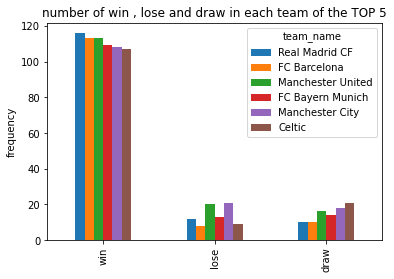

In [216]:
win=match.query("team_name in (@team_list) & match_result=='win' ").groupby(["team_name"])["match_result"].count().sort_values(ascending=False)
lose=match.query("team_name in (@team_list) & match_result=='lose'").groupby(["team_name"])["match_result"].count().sort_values(ascending=False)
draw=match.query("team_name in (@team_list) & match_result=='draw'").groupby(["team_name"])["match_result"].count().sort_values(ascending=False)

df_m=pd.DataFrame(data=[win,lose,draw],index=["win","lose","draw"])
df_m.head()
df_m.plot.bar()
plt.title("number of win , lose and draw in each team of the TOP 5")
plt.ylabel("frequency")

the most winning teams : real madrid , barcelona , man united
the most losing teams : mancity , man united , bayern
the least losing teams : barcelona , celtic , real madrid


### Research Question 6 (the most preferred foot in all teams and leagues!)


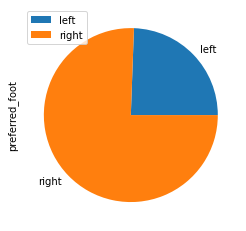

In [217]:
player_att.groupby("preferred_foot")["preferred_foot"].count().plot(kind="pie");
plt.legend();

the right foot is the most preferred foot


### Research Question 7 (the best age for the highest player attributes!)



In [218]:
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  11060 non-null  int64         
 1   player_api_id       11060 non-null  int64         
 2   player_name         11060 non-null  object        
 3   player_fifa_api_id  11060 non-null  int64         
 4   birthday            11060 non-null  datetime64[ns]
 5   height              11060 non-null  float64       
 6   weight              11060 non-null  int64         
 7   age                 11060 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 691.4+ KB


In [219]:
player_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 46 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   183978 non-null  int64         
 1   player_fifa_api_id   183978 non-null  int64         
 2   player_api_id        183978 non-null  int64         
 3   date                 183978 non-null  datetime64[ns]
 4   overall_rating       183978 non-null  float64       
 5   potential            183978 non-null  float64       
 6   preferred_foot       183142 non-null  object        
 7   attacking_work_rate  180748 non-null  object        
 8   defensive_work_rate  183142 non-null  object        
 9   crossing             183978 non-null  float64       
 10  finishing            183978 non-null  float64       
 11  heading_accuracy     183978 non-null  float64       
 12  short_passing        183978 non-null  float64       
 13  volleys       

In [220]:
a_z=player_att.groupby(["player_age"],as_index=False)[["finishing","strength","overall_rating"]].count()
a_z

,player_age,finishing,strength,overall_rating
0,17,10,10,10
1,18,135,135,135
2,19,897,897,897
3,20,2291,2291,2291
4,21,4055,4055,4055
5,22,6666,6666,6666
6,23,8390,8390,8390
7,24,10412,10412,10412
8,25,12588,12588,12588
9,26,12622,12622,12622


In [221]:
a_df=pd.DataFrame(a_z)
# a_df.rename(columns={"finishing":"frequency"} , inplace=True)
a_df.head()

,player_age,finishing,strength,overall_rating
0,17,10,10,10
1,18,135,135,135
2,19,897,897,897
3,20,2291,2291,2291
4,21,4055,4055,4055


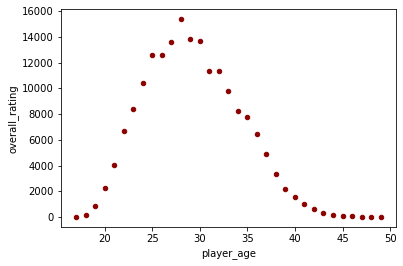

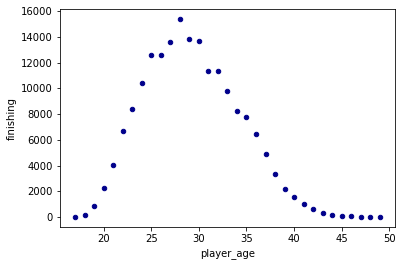

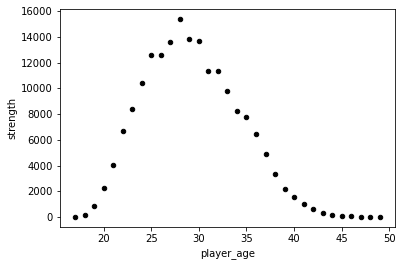

In [222]:
a_df.plot.scatter(x="player_age" , y="overall_rating",color="DarkRed");
a_df.plot.scatter(x="player_age" , y="finishing",color="DarkBlue");
a_df.plot.scatter(x="player_age" , y="strength",color="blacK");

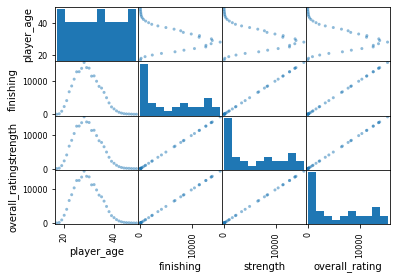

In [223]:
pd.plotting.scatter_matrix(a_df);

FROM THESE GRAPHS WE CAN SAY THAT 
- THE BEST PERFORMANCE FOR ANY PLAYER IS IN AGE BETWEEN 25,29
- BEFORE THE AGE 25 , THE PERFORMANCE AND THE ABILITY OF THE PLAYER WAS STILL UNDER DEVELOPEMENT
- AFTER THE AGE 30 , THE PERFORMANCE AND THE ABILITY OF THE PLAYER WAS DECREASED BECAUSE OF THE AGE

### Research Question 8 (the correlation between the different attributes in the player!)



In [224]:
#make new dataframe with the important abilities and execlustion of the unnecessary one
for_fun=player_att.iloc[:,np.r_[4:32,43,45]]

In [225]:
df_fun=pd.DataFrame(for_fun)
df_fun.head()

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,player_name,player_age
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,Aaron Appindangoye,24
1,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,Aaron Appindangoye,24
2,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,Aaron Appindangoye,24
3,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,Aaron Appindangoye,24
4,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,Aaron Appindangoye,24


In [226]:
corr=df_fun.corr()

In [227]:
corr.style.background_gradient(cmap="coolwarm")
# plt.figure(figsize=(15,15))
# g=sns.heatmap(corr)


,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,player_age
overall_rating,1.000000,0.766757,0.357699,0.329298,0.314099,0.458361,0.359036,0.354324,0.355363,0.349592,0.435018,0.444257,0.245655,0.254841,0.238281,0.769246,0.159284,0.427996,0.257279,0.327456,0.318661,0.392382,0.323934,0.250370,0.370019,0.271208
potential,0.766757,1.000000,0.277755,0.286684,0.207706,0.382605,0.299272,0.338675,0.294078,0.263358,0.343716,0.401368,0.338044,0.340054,0.290976,0.580235,0.200614,0.325697,0.173641,0.260509,0.126931,0.312808,0.164815,0.165730,0.327829,-0.104963
crossing,0.357699,0.277755,1.000000,0.576860,0.369747,0.790150,0.634973,0.809061,0.785521,0.707576,0.681959,0.807302,0.599012,0.579409,0.596507,0.384514,0.516146,0.656280,0.021223,0.564360,-0.070291,0.715925,0.323599,0.305952,0.682113,0.036016
finishing,0.329298,0.286684,0.576860,1.000000,0.373536,0.579365,0.847360,0.784659,0.687971,0.632248,0.337601,0.719709,0.528942,0.509506,0.551645,0.354473,0.392171,0.726982,0.008911,0.346688,-0.053048,0.806005,0.043714,-0.149366,0.798441,-0.004857
heading_accuracy,0.314099,0.207706,0.369747,0.373536,1.000000,0.548700,0.389552,0.400494,0.319409,0.307587,0.358634,0.551049,0.200077,0.267273,0.068851,0.295348,0.078532,0.540868,0.285275,0.477466,0.493051,0.406758,0.575705,0.452849,0.411554,0.107910
short_passing,0.458361,0.382605,0.790150,0.579365,0.548700,1.000000,0.636628,0.787994,0.728148,0.692461,0.797488,0.890042,0.503266,0.491380,0.507700,0.459289,0.459100,0.721767,0.059806,0.609956,0.092084,0.728791,0.453783,0.424288,0.677577,0.014929
volleys,0.359036,0.299272,0.634973,0.847360,0.389552,0.636628,1.000000,0.780568,0.752248,0.678982,0.412437,0.745872,0.511324,0.491946,0.559756,0.394737,0.415812,0.742594,0.023230,0.381392,-0.035950,0.810595,0.127336,-0.037466,0.775134,0.054085
dribbling,0.354324,0.338675,0.809061,0.784659,0.400494,0.787994,0.780568,1.000000,0.806479,0.705863,0.574307,0.900768,0.698161,0.669503,0.699678,0.377661,0.543420,0.744135,0.008518,0.525359,-0.111598,0.806329,0.202770,0.106738,0.793309,-0.111216
curve,0.355363,0.294078,0.785521,0.687971,0.319409,0.728148,0.752248,0.806479,1.000000,0.793008,0.583308,0.794810,0.547301,0.514656,0.619253,0.390441,0.493112,0.691128,-0.016958,0.452841,-0.113862,0.779856,0.202713,0.135767,0.717255,0.020691
free_kick_accuracy,0.349592,0.263358,0.707576,0.632248,0.307587,0.692461,0.678982,0.705863,0.793008,1.000000,0.599103,0.719743,0.430791,0.394848,0.502209,0.368100,0.428034,0.682790,-0.033079,0.416123,-0.056184,0.772652,0.232429,0.178005,0.654151,0.096569


<AxesSubplot:xlabel='player_age', ylabel='acceleration'>

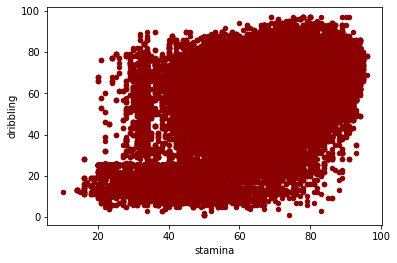

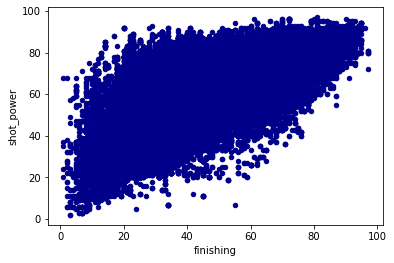

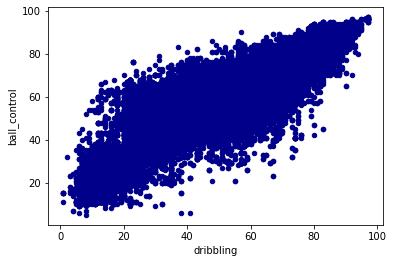

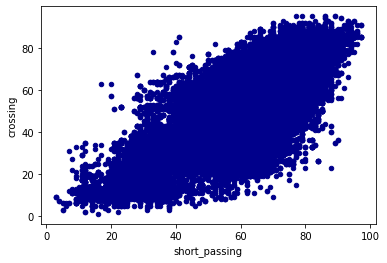

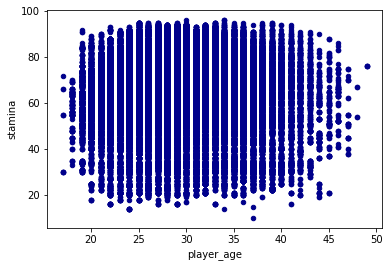

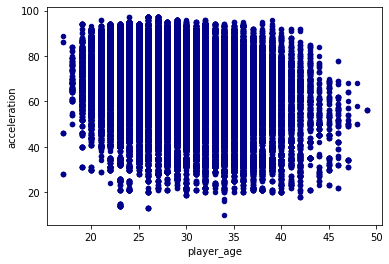

In [228]:
df_fun.plot(x="stamina",y="dribbling",kind="scatter",color="Darkred")
df_fun.plot(x="finishing",y="shot_power",kind="scatter",color="Darkblue")
df_fun.plot(x="dribbling",y="ball_control",kind="scatter",color="Darkblue")
df_fun.plot(x="short_passing",y="crossing",kind="scatter",color="Darkblue")
df_fun.plot(x="player_age",y="stamina",kind="scatter",color="Darkblue")
df_fun.plot(x="player_age",y="acceleration",kind="scatter",color="Darkblue")

                ###Examples from the high correlation abilities###

<AxesSubplot:xlabel='heading_accuracy', ylabel='sprint_speed'>

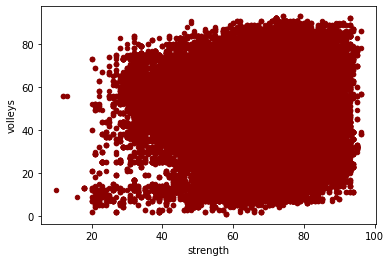

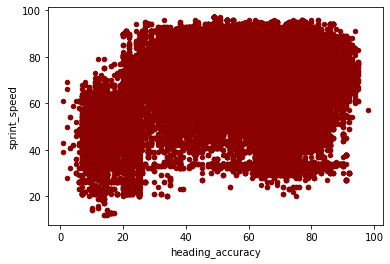

In [229]:
df_fun.plot(x="strength",y="volleys",kind="scatter",color="Darkred")
df_fun.plot(x="heading_accuracy",y="sprint_speed",kind="scatter",color="Darkred")


                    ###examples of lowe correlations abilities###

the correlation matrix shows that for example:
-    there is a high correlation between stamina , dribbling and shot_power , finishing 
-   there is a low correlation between potential , crossing and sprint_speed , heading accuracy

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

- england , france and italy : are played the highest number of matches each season
- the most league which contain penalties was 2013
- the highest player that had penalties in 2013 was Mario Balotelli
- the highest player in attribuete was dos Santos Fabio Junior 
- dos Santos Fabio Junior
- the most winning leagues are : england , spain ,france
- the most losing leagues are :england , france , spain
- the england league is the most intersting league 
- Top 5 Winning team : real madrid , barcelona , man united , bayern , celtic
- the most predferred foot for any player was the right foot
- the best perofrmance of the player is in age between 25 , 29

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

### Limitations
> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

- the dataset wasnt updated since long time ago
- there are many columns that has no use such as the betting odds columns of match file
- the missing value in match file was very high 
- the goal and possession columns contain weired str and i couldnt handle it 

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [115]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295